# Hidden Layers = 10

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 7000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 10 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.336221
Step 1000: Minibatch Loss: 0.066389
Step 2000: Minibatch Loss: 0.067131
Step 3000: Minibatch Loss: 0.065206
Step 4000: Minibatch Loss: 0.066963
Step 5000: Minibatch Loss: 0.063236
Step 6000: Minibatch Loss: 0.062690
Step 7000: Minibatch Loss: 0.060114
Original Images


<Figure size 600x600 with 1 Axes>

Reconstructed Images


<Figure size 600x600 with 1 Axes>

0.28199999999999997

In [2]:
import K_means

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
e.shape

(55000, 10)

In [4]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.2917090909090909 Gini: 0.763310064386
1
Purity: 0.2944181818181818 Gini: 0.785000054759
2
Purity: 0.2978909090909091 Gini: 0.795949791121
3
Purity: 0.2990181818181818 Gini: 0.802530198947
4
Purity: 0.2995090909090909 Gini: 0.806862659587
5
Purity: 0.29972727272727273 Gini: 0.809949065259
6
Purity: 0.2999818181818182 Gini: 0.811926615163
7
Purity: 0.30018181818181816 Gini: 0.813459386066
8
Purity: 0.2998909090909091 Gini: 0.814960562256
9
Purity: 0.2998 Gini: 0.816130229331
10
Purity: 0.29954545454545456 Gini: 0.817311311014
11
Purity: 0.29918181818181816 Gini: 0.818498414628
12
Purity: 0.2988363636363636 Gini: 0.819428124002
13
Purity: 0.29814545454545455 Gini: 0.82021213993
14
Purity: 0.2980181818181818 Gini: 0.820959331374
15
Purity: 0.2979818181818182 Gini: 0.821372150405
16
Purity: 0.2978363636363636 Gini: 0.821829717969
17
Purity: 0.2979818181818182 Gini: 0.822100333341
18
Purity: 0.2976909090909091 Gini: 0.822476816299
19
Purity: 0.29774545454545454 Gini: 0.8227076488

# K = 20

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.370669
Step 1000: Minibatch Loss: 0.067194
Step 2000: Minibatch Loss: 0.059048
Step 3000: Minibatch Loss: 0.053544
Step 4000: Minibatch Loss: 0.052549
Step 5000: Minibatch Loss: 0.046638
Step 6000: Minibatch Loss: 0.041613
Step 7000: Minibatch Loss: 0.041445
Original Images


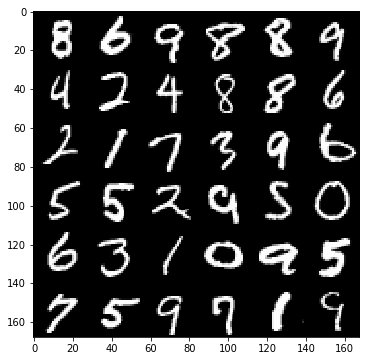

Reconstructed Images


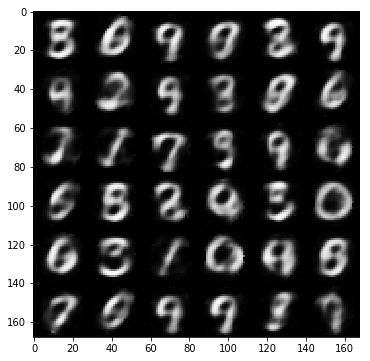

0.70279999999999998

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 7000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 20 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

In [6]:
e.shape

(55000, 20)

In [7]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.4450363636363636 Gini: 0.662048637833
1
Purity: 0.4867090909090909 Gini: 0.646474048179
2
Purity: 0.5337454545454545 Gini: 0.620361375415
3
Purity: 0.5577636363636364 Gini: 0.600141481451
4
Purity: 0.5632545454545455 Gini: 0.59504023384
5
Purity: 0.5644727272727272 Gini: 0.593935834882
6
Purity: 0.5623272727272727 Gini: 0.593502786417
7
Purity: 0.5658545454545455 Gini: 0.585586608174
8
Purity: 0.5693272727272727 Gini: 0.585273656966
9
Purity: 0.5715090909090909 Gini: 0.586267584862
10
Purity: 0.5736727272727272 Gini: 0.586167572157
11
Purity: 0.5758363636363636 Gini: 0.585709682188
12
Purity: 0.5776545454545454 Gini: 0.584788998028
13
Purity: 0.5798909090909091 Gini: 0.58346424426
14
Purity: 0.5813636363636364 Gini: 0.582610786754
15
Purity: 0.5822363636363637 Gini: 0.581997850992
16
Purity: 0.5826545454545454 Gini: 0.581701393117
17
Purity: 0.5827636363636364 Gini: 0.581399609372
18
Purity: 0.5824727272727273 Gini: 0.58154485992
19
Purity: 0.5822727272727273 Gini: 0.581367

# K = 50

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.388167
Step 1000: Minibatch Loss: 0.073147
Step 2000: Minibatch Loss: 0.067273
Step 3000: Minibatch Loss: 0.061823
Step 4000: Minibatch Loss: 0.051858
Step 5000: Minibatch Loss: 0.046527
Step 6000: Minibatch Loss: 0.041635
Step 7000: Minibatch Loss: 0.038102
Original Images


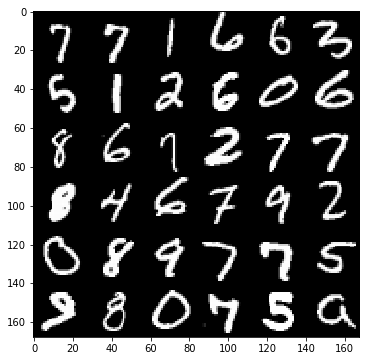

Reconstructed Images


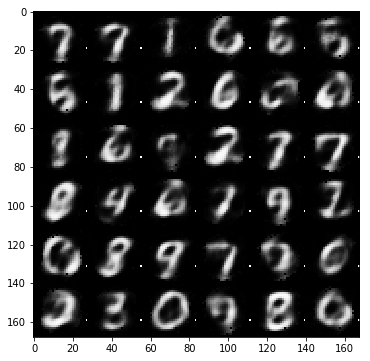

0.76939999999999997

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 7000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 50 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

In [11]:
e.shape

(55000, 50)

In [12]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.3931818181818182 Gini: 0.749580933366
1
Purity: 0.4701818181818182 Gini: 0.684351580091
2
Purity: 0.5122545454545454 Gini: 0.644046151715
3
Purity: 0.531290909090909 Gini: 0.628816274915
4
Purity: 0.5429454545454545 Gini: 0.619109311939
5
Purity: 0.5527454545454545 Gini: 0.607386070772
6
Purity: 0.5589636363636363 Gini: 0.597236436433
7
Purity: 0.5612727272727273 Gini: 0.591574055825
8
Purity: 0.5621454545454545 Gini: 0.588982825642
9
Purity: 0.562509090909091 Gini: 0.587117347829
10
Purity: 0.5630181818181819 Gini: 0.586254234613
11
Purity: 0.5638727272727273 Gini: 0.585587810497
12
Purity: 0.5646545454545454 Gini: 0.585447554378
13
Purity: 0.5658 Gini: 0.584881785711
14
Purity: 0.5666181818181818 Gini: 0.585113756896
15
Purity: 0.5677454545454546 Gini: 0.584996551525
16
Purity: 0.5686181818181818 Gini: 0.584952885798
17
Purity: 0.5696181818181818 Gini: 0.584998929545
18
Purity: 0.5709272727272727 Gini: 0.585175841023
19
Purity: 0.5731636363636363 Gini: 0.584964420837
20
P

Purity: 0.6238363636363636 Gini: 0.514148476388
164
Purity: 0.6230727272727272 Gini: 0.514197596846
165
Purity: 0.6224545454545455 Gini: 0.514459924843
166
Purity: 0.6216545454545455 Gini: 0.514879820198
167
Purity: 0.6209454545454546 Gini: 0.515033711944
168
Purity: 0.6199090909090909 Gini: 0.515638376585
169
Purity: 0.6193272727272727 Gini: 0.515742159943
170
Purity: 0.6187454545454546 Gini: 0.516006088691
171
Purity: 0.6182181818181818 Gini: 0.516142257367
172
Purity: 0.6178727272727272 Gini: 0.516333775673
173
Purity: 0.6174909090909091 Gini: 0.516395892884
174
Purity: 0.6171090909090909 Gini: 0.516516629942
175
Purity: 0.616890909090909 Gini: 0.516654291455
176
Purity: 0.6164545454545455 Gini: 0.516882416896
177
Purity: 0.6161636363636364 Gini: 0.516922529684
178
Purity: 0.6158363636363636 Gini: 0.517192671156
179
Purity: 0.6155636363636363 Gini: 0.51743772255
180
Purity: 0.6153636363636363 Gini: 0.517387857792
181
Purity: 0.6150545454545454 Gini: 0.517449827882
182
Purity: 0.6148

# K = 100

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.433567
Step 1000: Minibatch Loss: 0.068536
Step 2000: Minibatch Loss: 0.053186
Step 3000: Minibatch Loss: 0.050165
Step 4000: Minibatch Loss: 0.044097
Step 5000: Minibatch Loss: 0.043213
Step 6000: Minibatch Loss: 0.041320
Step 7000: Minibatch Loss: 0.037253
Original Images


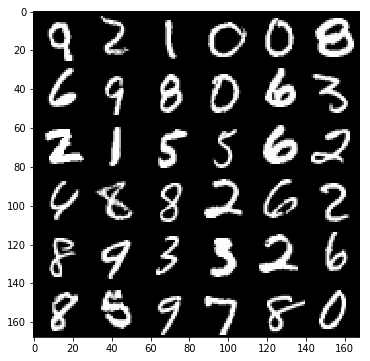

Reconstructed Images


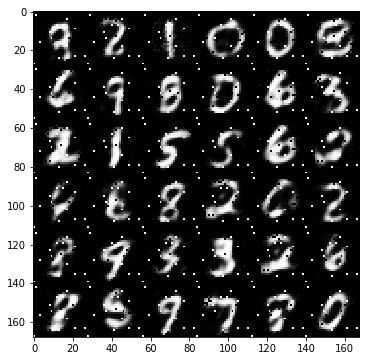

0.85740000000000005

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 7000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 100 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

In [14]:
e.shape

(55000, 100)

In [15]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.3842 Gini: 0.743281817186
1
Purity: 0.4436 Gini: 0.681617339854
2
Purity: 0.48525454545454544 Gini: 0.634868083655
3
Purity: 0.5192909090909091 Gini: 0.593467094054
4
Purity: 0.5455272727272727 Gini: 0.563004132302
5
Purity: 0.5619090909090909 Gini: 0.540819340209
6
Purity: 0.5696545454545454 Gini: 0.53033215326
7
Purity: 0.574490909090909 Gini: 0.52314156071
8
Purity: 0.5782363636363637 Gini: 0.518747493247
9
Purity: 0.5802 Gini: 0.517534217367
10
Purity: 0.5816727272727272 Gini: 0.518146422015
11
Purity: 0.5831636363636363 Gini: 0.519334018239
12
Purity: 0.5852909090909091 Gini: 0.52000657816
13
Purity: 0.5862909090909091 Gini: 0.521177378378
14
Purity: 0.5875090909090909 Gini: 0.520529670508
15
Purity: 0.5881818181818181 Gini: 0.519513250735
16
Purity: 0.5887818181818182 Gini: 0.51821628893
17
Purity: 0.5894727272727273 Gini: 0.516793858621
18
Purity: 0.5900545454545455 Gini: 0.515630375194
19
Purity: 0.5910545454545455 Gini: 0.514471944126
20
Purity: 0.5912545454545455 

# K = 200

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.440608
Step 1000: Minibatch Loss: 0.065378
Step 2000: Minibatch Loss: 0.051934
Step 3000: Minibatch Loss: 0.045228
Step 4000: Minibatch Loss: 0.045105
Step 5000: Minibatch Loss: 0.042950
Step 6000: Minibatch Loss: 0.040338
Step 7000: Minibatch Loss: 0.040120
Original Images


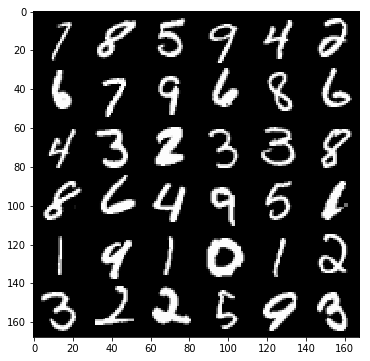

Reconstructed Images


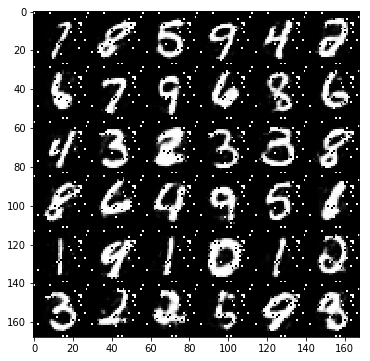

0.88949999999999996

In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 7000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 200 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

In [17]:
e.shape

(55000, 200)

In [18]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.43134545454545453 Gini: 0.705107744895
1
Purity: 0.5397090909090909 Gini: 0.588371393934
2
Purity: 0.5824727272727273 Gini: 0.534461806035
3
Purity: 0.5980363636363636 Gini: 0.513331340472
4
Purity: 0.6071636363636363 Gini: 0.505835459752
5
Purity: 0.6146545454545455 Gini: 0.502680884241
6
Purity: 0.6195454545454545 Gini: 0.500343848175
7
Purity: 0.6217272727272727 Gini: 0.497285388044
8
Purity: 0.6211272727272728 Gini: 0.494862141818
9
Purity: 0.6188727272727272 Gini: 0.492685463024
10
Purity: 0.6154727272727273 Gini: 0.490960916184
11
Purity: 0.6149636363636364 Gini: 0.490379504224
12
Purity: 0.6187272727272727 Gini: 0.487744225363
13
Purity: 0.6220727272727272 Gini: 0.485056251973
14
Purity: 0.624890909090909 Gini: 0.482086009448
15
Purity: 0.6275818181818181 Gini: 0.479298143427
16
Purity: 0.629109090909091 Gini: 0.477391422993
17
Purity: 0.6302181818181818 Gini: 0.476611141077
18
Purity: 0.6309090909090909 Gini: 0.47653571473
19
Purity: 0.6319272727272728 Gini: 0.47601